In [ ]:
import base64
from sklearnex import patch_sklearn
from importlib import reload

import cv2 as cv
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from PIL import Image
patch_sklearn()
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import MinMaxScaler

from video import vid as v
from video import videolike as vl
from video.conversion import Conversions

In [2]:
reload(vl)
reload(v)
resize = (100,100)
pokemon = v.Video.from_file('videos/Banned Pokemon Seizure Scene.mp4',Conversions.RGB,resize=resize)
pokevid = pokemon.blur(3).vid

In [3]:
pokeflat = pokevid.reshape((-1,3))

num_pixels = pokeflat.shape[0]
num_frames = pokevid.shape[0]
width = pokevid.shape[2]
height = pokevid.shape[1]
frame_xy_positions = np.zeros((num_pixels, 3), dtype=np.int32)

frame_num, y, x = np.indices((num_frames, height, width))
frame_xy_positions[:, 0] = frame_num.ravel()
frame_xy_positions[:, 1] = y.ravel()
frame_xy_positions[:, 2] = x.ravel()
pokedata = np.concatenate([pokeflat,frame_xy_positions],axis=1)
pokedata = MinMaxScaler().fit_transform(pokedata)

In [4]:
dbscan = DBSCAN(eps=0.1,min_samples=20,n_jobs=4)
dbclusters = dbscan.fit_predict(pokedata)

: 

: 

In [ ]:
dbclusters = dbclusters.reshape((num_frames,height,width,-1))

In [ ]:
kmin = 2
kmax = 10
inertias = [KMeans(n_clusters=k,n_init=10).fit(pokedata).inertia_ for k in range(kmin,kmax)]


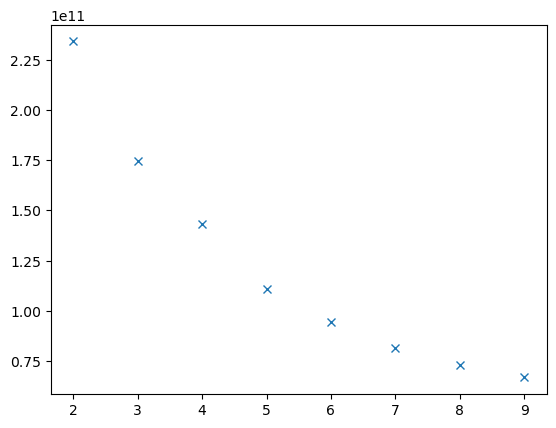

In [ ]:
plt.plot(range(kmin,kmax),inertias,'x')



In [ ]:
kmeans = KMeans(n_clusters=6,n_init='auto').fit(pokedata)
kclusters = kmeans.predict(pokedata)
kclusters = kclusters.reshape((pokevid.shape[0],pokevid.shape[1],pokevid.shape[2],1))

In [ ]:
def update_frame(frame):
    plt.axis('off')
    plt.subplot(1,3,1)
    plt.title("Original Video")
    plt.imshow(pokevid[frame])
    plt.subplot(1,3,2)
    plt.title("DBSCAN Clusters")
    plt.imshow(dbclusters[frame],cmap='jet')
    plt.subplot(1,3,3)
    plt.title("KMeans Clusters")
    plt.imshow(kclusters[frame],cmap='jet')
    plt.show()
frame_slider = widgets.IntSlider(min=0, max=pokevid.shape[0]-1, step=1, value=0,continuous_update=False)
widgets.interact(update_frame,frame=frame_slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='frame', max=784), Output()), _d…

<function __main__.update_frame(frame)>